In [2]:
%%capture
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import pandas as pd
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.13.0


In [4]:
!python --version


Python 3.12.3


In [5]:
data = pd.read_csv('data/medium_data.csv')
data.head()

,id,url,title,subtitle,image,claps,responses,reading_time,publication,date
0,1,https://towardsdatascience.com/a-beginners-gui...,A Beginner’s Guide to Word Embedding with Gens...,NaN,1.png,850,8,8,Towards Data Science,2019-05-30
1,2,https://towardsdatascience.com/hands-on-graph-...,Hands-on Graph Neural Networks with PyTorch & ...,NaN,2.png,1100,11,9,Towards Data Science,2019-05-30
2,3,https://towardsdatascience.com/how-to-use-ggpl...,How to Use ggplot2 in Python,A Grammar of Graphics for Python,3.png,767,1,5,Towards Data Science,2019-05-30
3,4,https://towardsdatascience.com/databricks-how-...,Databricks: How to Save Files in CSV on Your L...,When I work on Python projects dealing…,4.jpeg,354,0,4,Towards Data Science,2019-05-30
4,5,https://towardsdatascience.com/a-step-by-step-...,A Step-by-Step Implementation of Gradient Desc...,One example of building neural…,5.jpeg,211,3,4,Towards Data Science,2019-05-30


In [6]:
print("Number of records: ", data.shape[0])
print("Number of fields: ", data.shape[1])

Number of records:  6508
Number of fields:  10


In [7]:
data['title']

0       A Beginner’s Guide to Word Embedding with Gens...
1       Hands-on Graph Neural Networks with PyTorch & ...
2                            How to Use ggplot2 in Python
3       Databricks: How to Save Files in CSV on Your L...
4       A Step-by-Step Implementation of Gradient Desc...
                              ...                        
6503    “We” vs “I” — How Should You Talk About Yourse...
6504                     How Donald Trump Markets Himself
6505        Content and Marketing Beyond Mass Consumption
6506    5 Questions All Copywriters Should Ask Clients...
6507               How To Write a Good Business Blog Post
Name: title, Length: 6508, dtype: object

In [8]:
data['title'] = data['title'].apply(lambda x: x.replace(u'\xa0',u' '))
data['title'] = data['title'].apply(lambda x: x.replace('\u200a',' '))

In [9]:
tokenizer = Tokenizer(oov_token='<oov>') # For those words which are not found in word_index
tokenizer.fit_on_texts(data['title'])
total_words = len(tokenizer.word_index) + 1

print("Total number of words: ", total_words)
print("Word: ID")
print("------------")
print("<oov>: ", tokenizer.word_index['<oov>'])
print("Strong: ", tokenizer.word_index['strong'])
print("And: ", tokenizer.word_index['and'])
print("Consumption: ", tokenizer.word_index['consumption'])

Total number of words:  8238
Word: ID
------------
<oov>:  1
Strong:  4
And:  8
Consumption:  8237


In [10]:
input_sequences = []
for line in data['title']:
    token_list = tokenizer.texts_to_sequences([line])[0]
    #print(token_list)
    
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

# print(input_sequences)
print("Total input sequences: ", len(input_sequences))

Total input sequences:  48461


In [11]:
# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
input_sequences[1]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   5, 676,
        68])

In [12]:
x = input_sequences[:,:-1]
lables = input_sequences[:,-1]
y = tf.keras.utils.to_categorical(lables, num_classes=total_words)


print(x[5])
print(lables[5])
print(y[5])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    5  676   68    2  452 1518]
14
[0. 0. 0. ... 0. 0. 0.]


In [10]:
# model = Sequential()
# model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
# model.add(Bidirectional(LSTM(100)))
# model.add(Dense(total_words, activation='softmax'))
# adam = Adam(lr=0.01)
# model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
# print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 39, 100)           823800    
                                                                 
 bidirectional (Bidirection  (None, 200)               160800    
 al)                                                             
                                                                 
 dense (Dense)               (None, 8238)              1655838   
                                                                 
Total params: 2640438 (10.07 MB)
Trainable params: 2640438 (10.07 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [11]:
# history = model.fit(x, y, epochs=70, verbose=1)

Epoch 1/70
1515/1515 [==============================] - 84s 54ms/step - loss: 7.0531 - accuracy: 0.0755
Epoch 2/70
1515/1515 [==============================] - 71s 47ms/step - loss: 6.2797 - accuracy: 0.1334
Epoch 3/70
1515/1515 [==============================] - 73s 48ms/step - loss: 5.8027 - accuracy: 0.1629
Epoch 4/70
1515/1515 [==============================] - 73s 48ms/step - loss: 5.3930 - accuracy: 0.1860
Epoch 5/70
1515/1515 [==============================] - 72s 47ms/step - loss: 5.0216 - accuracy: 0.2048
Epoch 6/70
1515/1515 [==============================] - 73s 48ms/step - loss: 4.6810 - accuracy: 0.2277
Epoch 7/70
1515/1515 [==============================] - 73s 48ms/step - loss: 4.3574 - accuracy: 0.2507
Epoch 8/70
1515/1515 [==============================] - 73s 48ms/step - loss: 4.0482 - accuracy: 0.2797
Epoch 9/70
1515/1515 [==============================] - 72s 47ms/step - loss: 3.7523 - accuracy: 0.3133
Epoch 10/70
1515/1515 [==============================] - 74s 49m

In [12]:
# print(model)

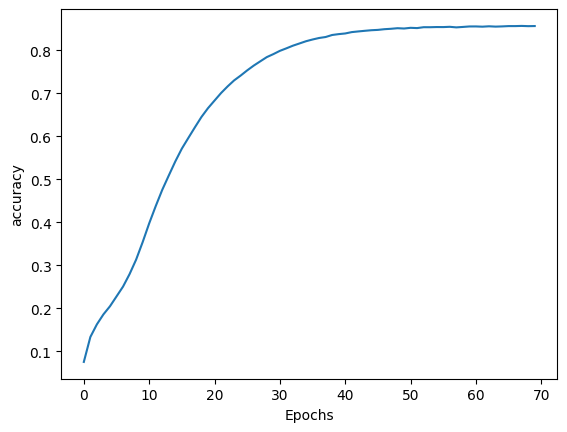

In [13]:
# import matplotlib.pyplot as plt


# def plot_graphs(history, string):
#     plt.plot(history.history[string])
#     plt.xlabel("Epochs")
#     plt.ylabel(string)
#     plt.show()

# plot_graphs(history, 'accuracy')

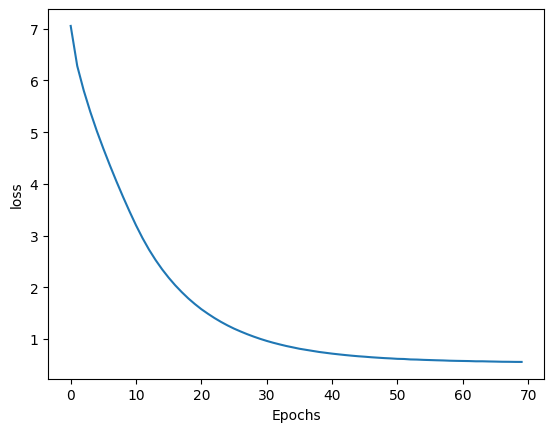

In [14]:
# plot_graphs(history, 'loss')

In [13]:
model = tf.keras.models.load_model('next_word_predict.h5')

In [14]:
dic = tokenizer.word_index
def generate(text,no_of_words):
    for i in range(no_of_words):
        tokenized_text = tokenizer.texts_to_sequences([text])[0]
        padded_seq = pad_sequences([tokenized_text],padding = "pre",maxlen = max_sequence_len-1)
        index = np.argmax(model.predict(padded_seq))
        for key,value in dic.items():
            if index+1 == value:
                text = text+" "+key
                print(text)

In [31]:
text1 = "Apple"
generate(text1,10)


1/1 [==============================] - 0s 18ms/step
Apple fast
1/1 [==============================] - 0s 16ms/step
Apple fast in
1/1 [==============================] - 0s 17ms/step
Apple fast in demand
1/1 [==============================] - 0s 18ms/step
Apple fast in demand be
1/1 [==============================] - 0s 16ms/step
Apple fast in demand be be
1/1 [==============================] - 0s 28ms/step
Apple fast in demand be be be
1/1 [==============================] - 0s 17ms/step
Apple fast in demand be be be of
1/1 [==============================] - 0s 21ms/step
Apple fast in demand be be be of tips
1/1 [==============================] - 0s 16ms/step
Apple fast in demand be be be of tips in
1/1 [==============================] - 0s 16ms/step
Apple fast in demand be be be of tips in yourself


In [17]:
# model.save('next_word_predict.h5')

c:\users\srina\appdata\local\programs\python\python38\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [18]:
# # Save only the model weights
# model.save_weights('new_word_weights.h5')
